### ***Momentum Analysis***

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ETH_USD_15Min.csv')
df.head()

,t,close,high,low,trade_count,open,volume,vwap
0,2021-01-01 06:00:00+00:00,743.69,744.61,742.15,17,742.15,5.16296,743.562012
1,2021-01-01 06:15:00+00:00,739.25,743.91,738.16,47,743.69,39.01128,740.034009
2,2021-01-01 06:30:00+00:00,741.00,741.48,738.64,50,739.21,82.11928,740.671763
3,2021-01-01 06:45:00+00:00,741.06,741.41,739.85,16,741.25,21.99636,741.118902
4,2021-01-01 07:00:00+00:00,737.34,741.86,736.11,52,741.41,95.07717,738.790665


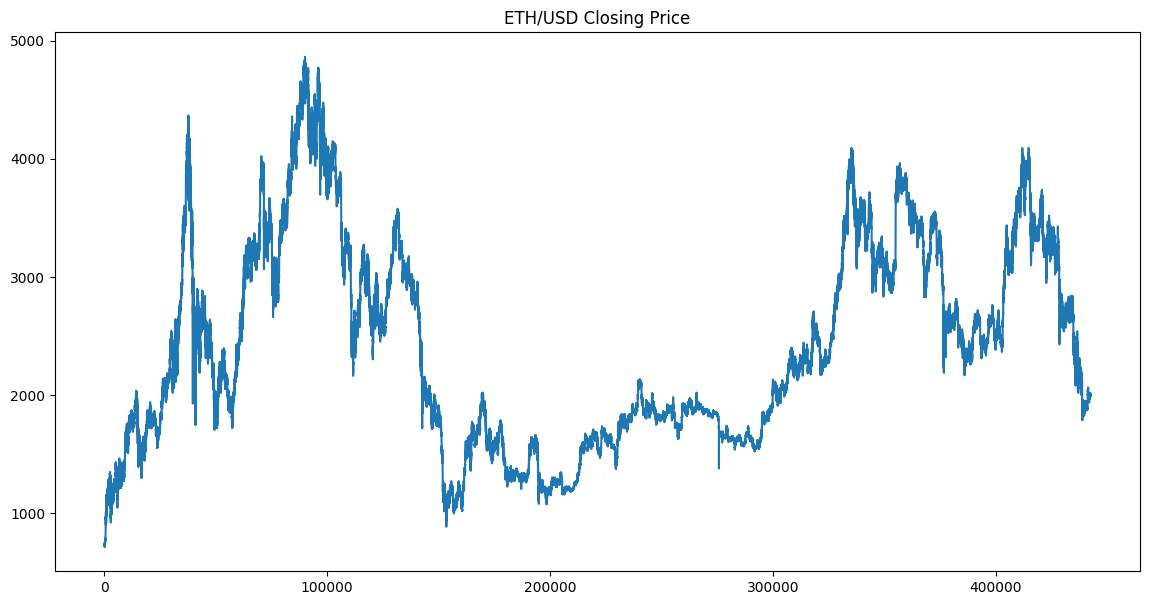

In [3]:
import matplotlib.pyplot as plt

# Plot the closing prices
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='ETH/USD Closing Price')
plt.title('ETH/USD Closing Price')
plt.show()

C:\Users\braed\AppData\Local\Temp\ipykernel_17164\2080307619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['tradecount_X_volume'] = df_recent['trade_count'] * df_recent['volume']


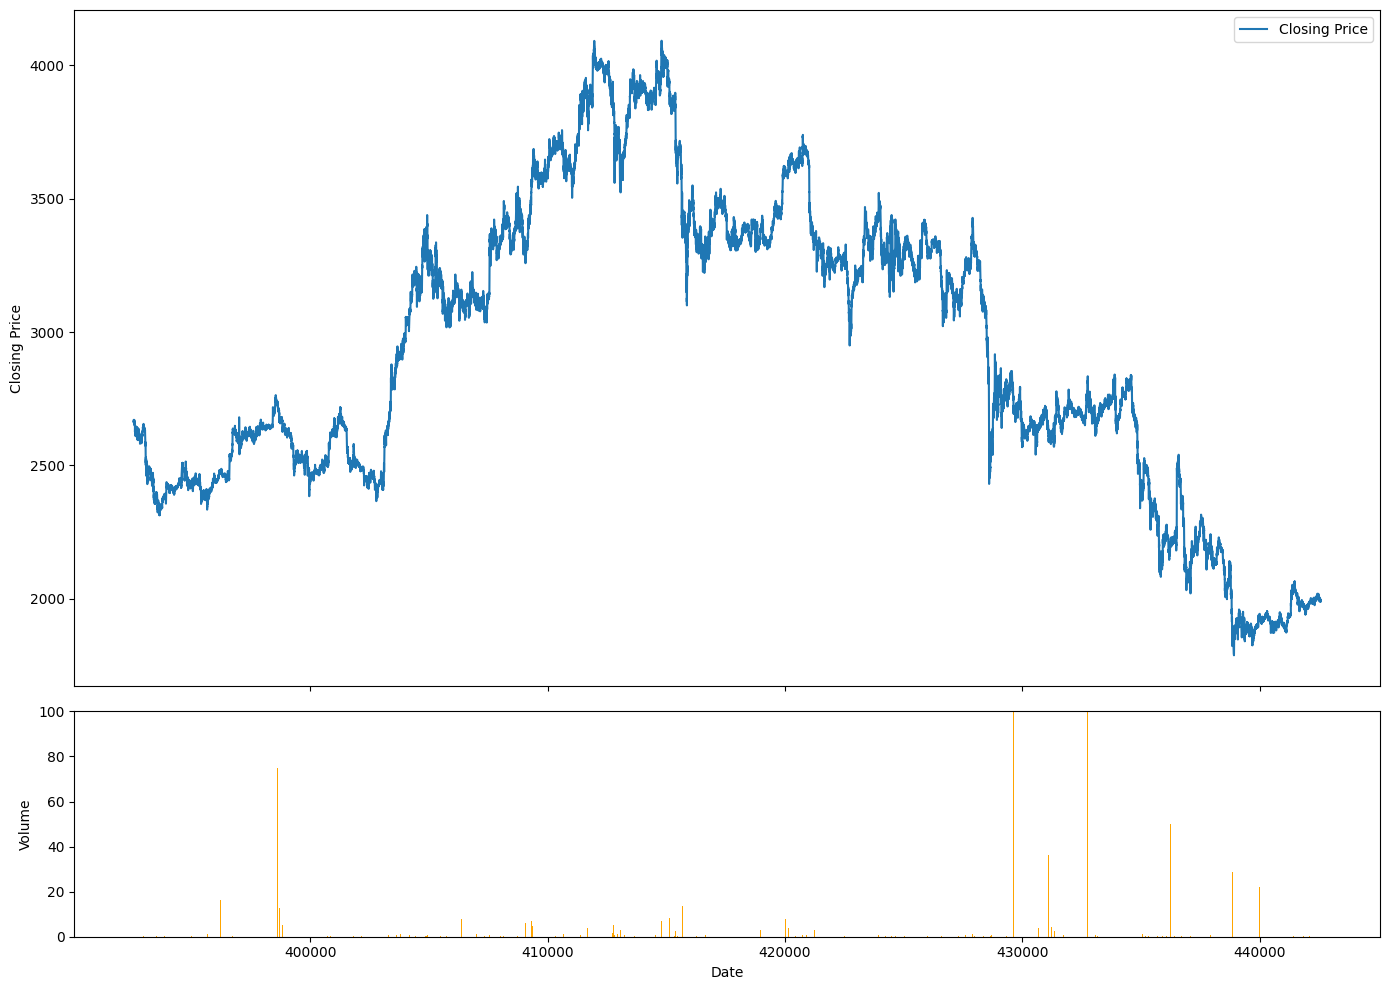

In [4]:
# Grabbing last 100,000 data points OR 347 days of data

df_recent = df[-50000:] 
df_recent['tradecount_X_volume'] = df_recent['trade_count'] * df_recent['volume']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Closing prices
ax1.plot(df_recent.index, df_recent['close'], label='Closing Price')
ax1.set_ylabel('Closing Price')
ax1.legend()

# Volume bars
ax2.bar(df_recent.index, df_recent['tradecount_X_volume'], color='orange')
ax2.set_ylim(0, 100)
ax2.set_ylabel('Volume')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [5]:

x = len(df_recent[df_recent['tradecount_X_volume'] >= 60])
y = len(df_recent[df_recent['tradecount_X_volume'] >= 40])
z = len(df_recent[df_recent['tradecount_X_volume'] >= 20])
h = len(df_recent[df_recent['tradecount_X_volume'] >= 10])

print(f"{x}: {y}: {z}: {h}")

112: 168: 281: 463


In [9]:
# moving averages 
df['ema12'] =df['close'].ewm(span=12, adjust=False).mean()
df['ema26'] =df['close'].ewm(span=26, adjust=False).mean()

# macd and signal line
df['macd'] = df['ema12'] - df['ema26']
df['macd_signal'] = df['macd'].ewm(span=9, adjust=False).mean()
df['macd_histogram'] = df['macd'] - df['macd_signal']

# RSI 
delta = df['close'].diff(1)

gain = delta.clip(lower=0) # gain is positive change in price (up days)
lose = -delta.clip(upper=0) # loss is negative change in price (down days)

avg_gain = gain.rolling(window=14).mean() # average gain over 14 periods
avg_loss = lose.rolling(window=14).mean() # average loss over 14 periods

rs = avg_gain / avg_loss # relative strength
df['rsi'] = 100 - (100 / (1 + rs)) # RSI formula


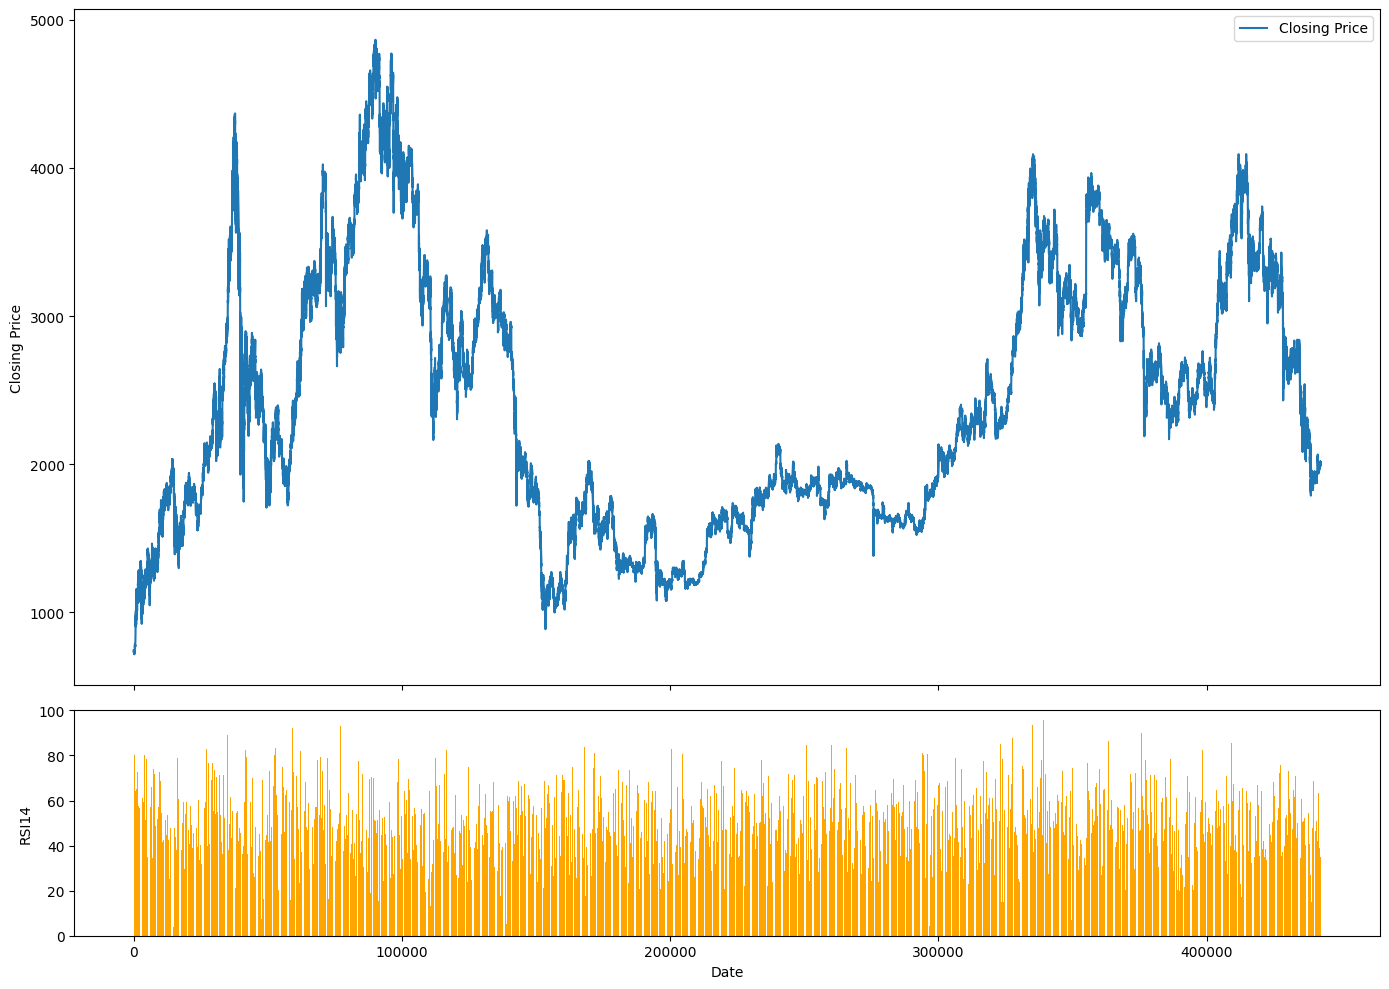

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Closing prices
ax1.plot(df.index, df['close'], label='Closing Price')
ax1.set_ylabel('Closing Price')
ax1.legend()

# Volume bars
ax2.bar(df.index, df['rsi'], color='orange')
ax2.set_ylim(0, 100)
ax2.set_ylabel('RSI14')

plt.xlabel('Date')
plt.tight_layout()
plt.show()